### Laboratorium 5 - zadania - transformacja Hougha

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

#### Zadanie 1

Zbadaj wpływ parametrów transformacji Hougha na jakość detekcji prostych na przykładzie obrazu `norway`. Wykorzystaj ulubiony detektor krawędzi i zaprezentuj jego wynik przed użyciem transformacji Hougha. Zapoznaj się z dokumentacją funkcji [`cv2.HoughLines`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a), zwłaszcza parametrami sterującymi rozdzielczością `rho`, `theta` oraz progiem (`threshold`). Błędnie dobrany próg może szczególnie negatywnie wpłynąć na wyniki.

Zacznij od znalezienia odpowiednich parametrów detektora krawędzi - jeśli na tym etapie wyniki będą słabe, to dalej będzie tylko gorzej (_garbage-in, garbage-out_) - ale nie skupiaj się na badaniu ich wpływu na wyniki.

Zadanie _nie_ polega na zrobieniu grid searcha parametrów transformacji Hougha, tylko na zrozumieniu zachowania parametrów `rho` i `theta`, oraz wpływu progu.

Ostateczny rezultat zaprezentuj w postaci odcinków naniesionych na kopię obrazu wejściowego (patrz komórka `[3]`).

In [71]:
norway = cv2.imread("norway.jpg")
plt.subplots(1, 1, figsize=(10, 10))[1].imshow(norway[..., ::-1])

In [72]:
def rhotheta2xy(line):
    # konwersja parametrów prostej w układzie rho-theta do odcinka w układzie kartezjańskim
    # wynik można użyć jako argumenty funkcji cv2.line
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 5000 * (-b))
    y1 = int(y0 + 5000 * (a))
    x2 = int(x0 - 5000 * (-b))
    y2 = int(y0 - 5000 * (a))
    return x1, y1, x2, y2

Rozwiązanie:

In [73]:
@interact(
    blur_size=IntSlider(11, 1, 15, 2),
    low_threshold=IntSlider(15, 0, 255, 1),
    high_threshold=IntSlider(135, 0, 255, 1),
)
def get_canny(blur_size, low_threshold, high_threshold):
    blurred_norway = cv2.GaussianBlur(norway, (blur_size, blur_size), 0)
    cannied_norway = cv2.Canny(
        blurred_norway, low_threshold, high_threshold, apertureSize=3
    )
    plt.subplots(1, 1, figsize=(10, 10))[1].imshow(cannied_norway, cmap="gray")

interactive(children=(IntSlider(value=11, description='blur_size', max=15, min=1, step=2), IntSlider(value=15,…

In [74]:
blur_size = 11
low_threshold = 15
high_threshold = 135
blurred_norway = cv2.GaussianBlur(norway, (blur_size, blur_size), 0)
cannied_norway = cv2.Canny(
    blurred_norway, low_threshold, high_threshold, apertureSize=3
)

In [75]:
@interact(rho=(0.1, 10, 0.1), theta=(1, 180, 1), threshold=(1, 10000, 1))
def draw_hough_lines(rho, theta, threshold):

    lines = cv2.HoughLines(cannied_norway, rho, np.pi / theta, threshold)

    norway_copy = cv2.cvtColor(norway.copy(), cv2.COLOR_BGR2RGB)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = rhotheta2xy(line)
            cv2.line(norway_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.subplots(1, 1, figsize=(10, 10))[1].imshow(norway_copy, cmap="gray")

interactive(children=(FloatSlider(value=5.0, description='rho', max=10.0, min=0.1), IntSlider(value=90, descri…

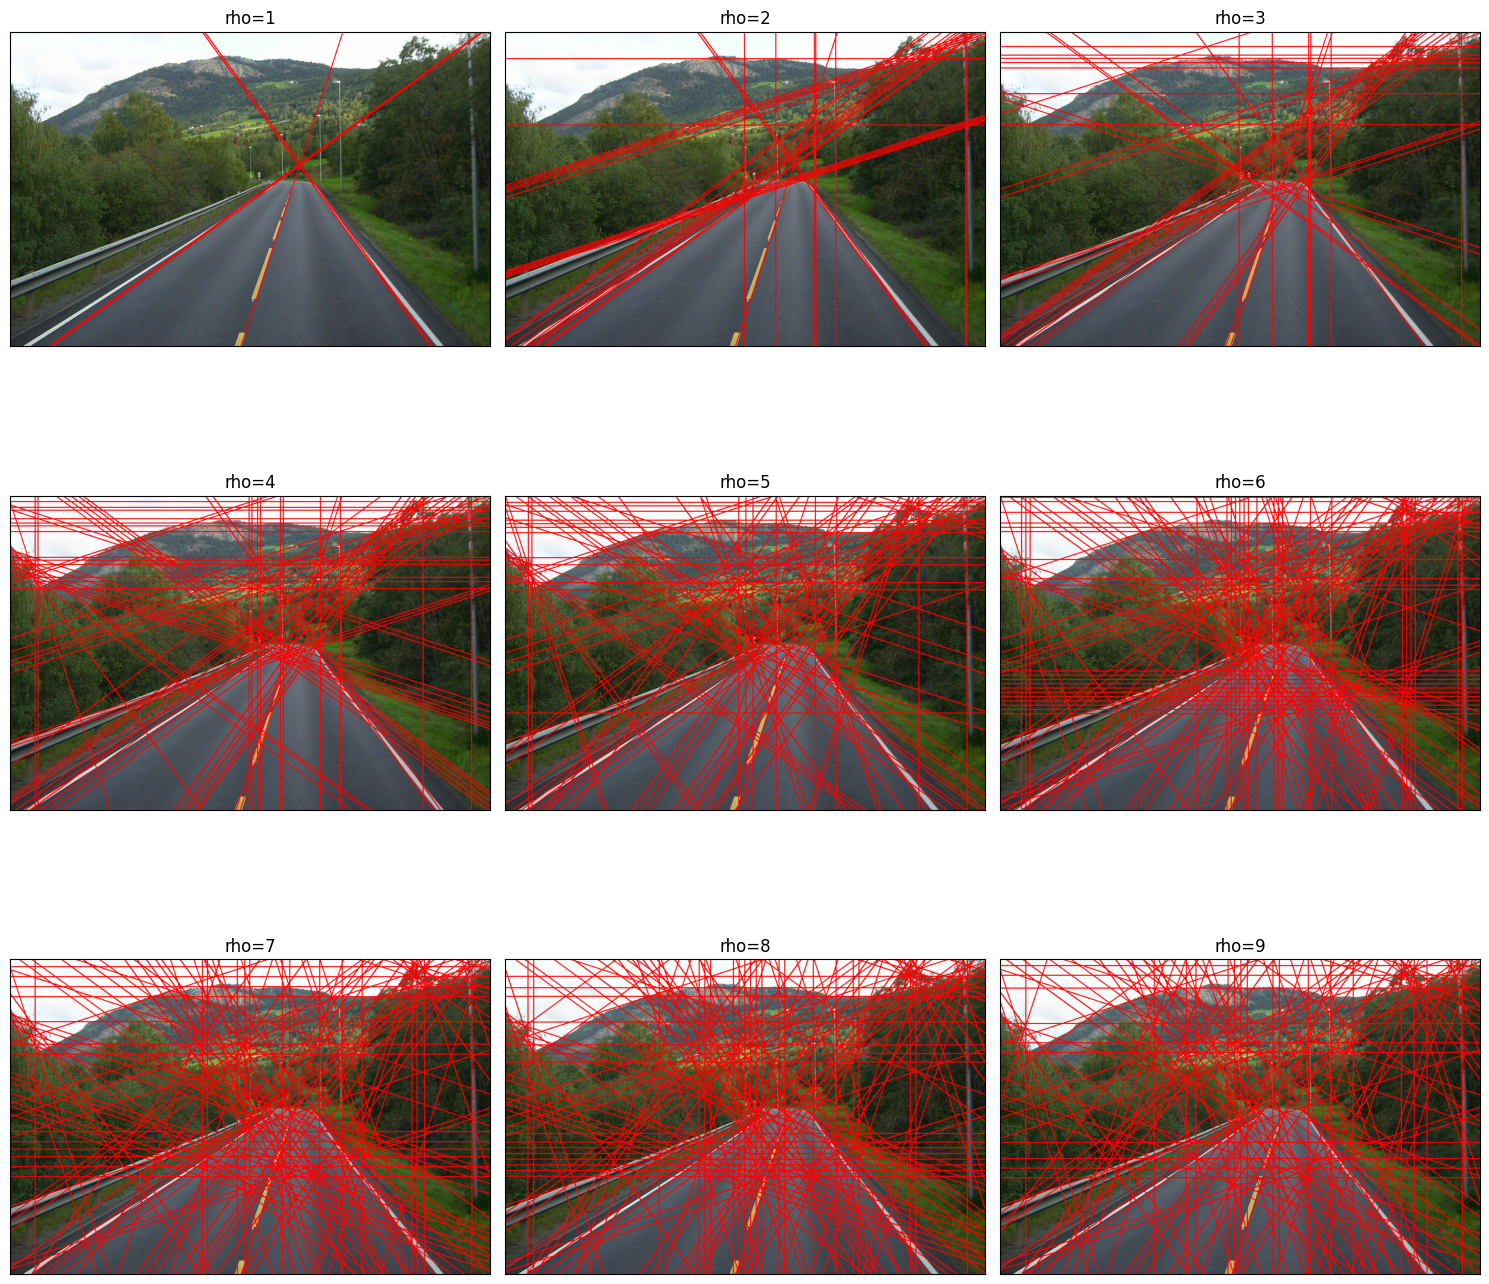

In [76]:
threshold = 100
theta = 10
rhos = np.arange(1, 10, 1)
fig, ax = plt.subplots(rhos.size // 3, 3, figsize=(15, 15))
for axes, rho in zip(ax.flatten(), rhos):
    lines = cv2.HoughLines(cannied_norway, rho, np.pi / theta, threshold)

    norway_copy = cv2.cvtColor(norway.copy(), cv2.COLOR_BGR2RGB)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = rhotheta2xy(line)
            cv2.line(norway_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
    axes.imshow(norway_copy, cmap="gray")
    axes.set_title(f"rho={rho}")
    axes.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

fig.tight_layout()

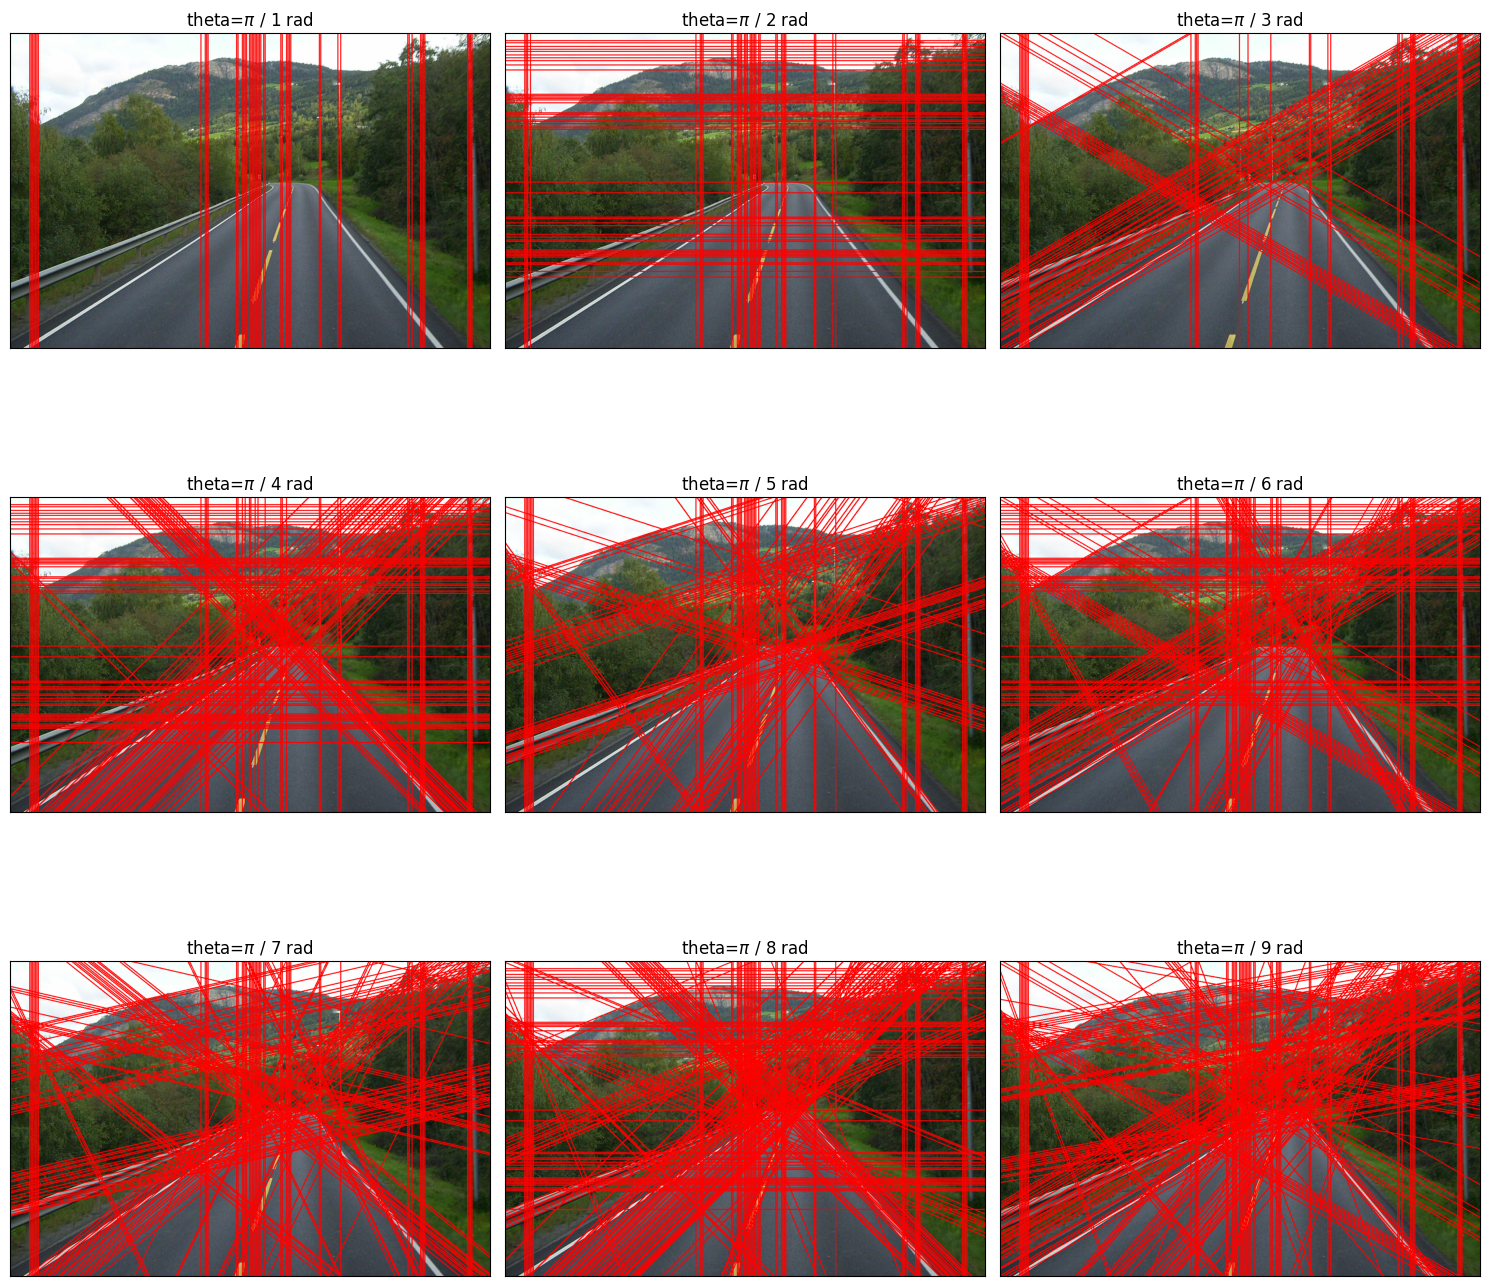

In [77]:
threshold = 50
thetas = np.arange(1, 10, 1)
rho = 2
fig, ax = plt.subplots(thetas.size // 3, 3, figsize=(15, 15))
for axes, theta in zip(ax.flatten(), thetas):
    lines = cv2.HoughLines(cannied_norway, rho, np.pi / theta, threshold)

    norway_copy = cv2.cvtColor(norway.copy(), cv2.COLOR_BGR2RGB)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = rhotheta2xy(line)
            cv2.line(norway_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
    axes.imshow(norway_copy, cmap="gray")
    axes.set_title(f"theta=$\pi$ / {theta} rad")
    axes.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

fig.tight_layout()

#### Zadanie 2

Dany jest obraz `pillbox`. Wykorzystaj transformację Hougha dla prostych, aby wykryć krawędzie między komórkami organizera.

Dla odmiany, w tym zadaniu nie jest istotne badanie parametrów ale wyłącznie końcowy wynik.

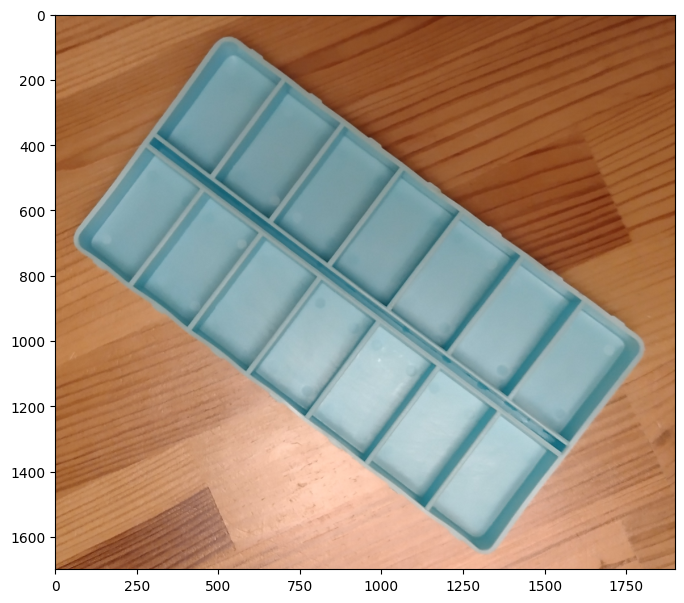

In [78]:
pillbox = cv2.imread("pillbox.png")
plt.subplots(1, 1, figsize=(8, 8))[1].imshow(pillbox[..., ::-1])

Rozwiązanie:

In [79]:
from ipywidgets import fixed


# probably: blursize 41 low 0 high 11000 aperture size 7
@interact(
    blur_size=IntSlider(41, 1, 75, 2),
    low_threshold=IntSlider(0, 0, 50000, 1),
    high_threshold=IntSlider(11000, 0, 50000, 1),
    aperture_size=(7, 7, 2),
    img=fixed(pillbox),
)
def get_canny(blur_size, low_threshold, high_threshold, img, aperture_size):
    img_blurred = cv2.GaussianBlur(img, (blur_size, blur_size), 0)
    img_canied = cv2.Canny(
        img_blurred, low_threshold, high_threshold, apertureSize=aperture_size
    )
    plt.subplots(1, 1, figsize=(10, 10))[1].imshow(img_canied, cmap="gray")

interactive(children=(IntSlider(value=41, description='blur_size', max=75, min=1, step=2), IntSlider(value=0, …

In [80]:
pillbox_blurred = cv2.GaussianBlur(pillbox, (41, 41), 0)
pillbox_cannied = cv2.Canny(pillbox_blurred, 0, 11000, apertureSize=7)

In [85]:
@interact(
    dil_iterations=(0, 10, 1),
    dil_kernel_size=(3, 10, 2),
    er_iterations=(0, 10, 1),
    er_kernel_size=(3, 10, 2),
)
def close_img(dil_iterations, dil_kernel_size, er_iterations, er_kernel_size):
    if dil_iterations > 0:
        kernel = np.ones((dil_kernel_size, dil_kernel_size), np.uint8)
        dilated = cv2.dilate(pillbox_cannied, kernel, iterations=dil_iterations)
    else:
        dilated = pillbox_cannied

    if er_iterations > 0:
        kernel = np.ones((er_kernel_size, er_kernel_size), np.uint8)
        eroded = cv2.erode(dilated, kernel, iterations=er_iterations)
    else:
        eroded = dilated
    plt.subplots(1, 1, figsize=(10, 10))[1].imshow(eroded, cmap="gray")

interactive(children=(IntSlider(value=5, description='dil_iterations', max=10), IntSlider(value=5, description…

In [81]:
@interact(rho=(0.1, 10, 0.1), theta=(1, 180, 1), threshold=(1, 10000, 1))
def draw_hough_lines(rho, theta, threshold):

    lines = cv2.HoughLines(pillbox_cannied, rho, np.pi / theta, threshold)

    pillbox_copy = cv2.cvtColor(pillbox.copy(), cv2.COLOR_BGR2RGB)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = rhotheta2xy(line)
            cv2.line(pillbox_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.subplots(1, 1, figsize=(10, 10))[1].imshow(pillbox_copy, cmap="gray")

interactive(children=(FloatSlider(value=5.0, description='rho', max=10.0, min=0.1), IntSlider(value=90, descri…

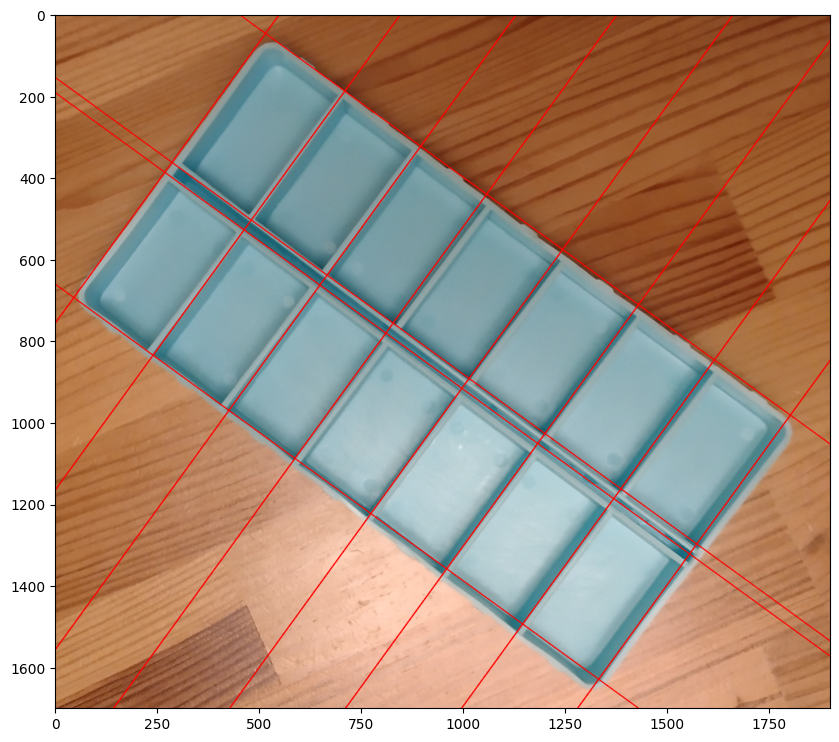

In [86]:
rho = 10
theta = 10
threshold = 540
lines = cv2.HoughLines(pillbox_cannied, rho, np.pi / theta, threshold)

pillbox_copy = cv2.cvtColor(pillbox.copy(), cv2.COLOR_BGR2RGB)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = rhotheta2xy(line)
        cv2.line(pillbox_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.subplots(1, 1, figsize=(10, 10))[1].imshow(pillbox_copy, cmap="gray")